<a href="https://colab.research.google.com/github/sheladiya2010-afk/Teleco_Customer_Churn/blob/main/Teleco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Explainability
import shap
import eli5

# Load dataset

df = pd.read_csv('Telco_churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Data Exploration & Cleaning (shape)

print("Dataset Shape : ",df.shape)

Dataset Shape :  (7043, 21)


In [ ]:
# info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# find And sum of null value

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# describe dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Preprocessing

# Drop customer id
df = df.drop('customerID', axis=1)

# Convert totalcharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle Missing values
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
  df[col] = LabelEncoder().fit_transform(df[col])

print(df.head())

   gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0       0              0        1  ...           29.85         29.85      0
1       1              0        0  ...           56.95       1889.50      0
2       1              0        0  ...           53.85        108.15      1
3       1              0        0  ...           42.30       1840.75      0
4       0              0        0  ...           70.70        151.65      1

[5 rows x 20 columns]


In [ ]:
# Train-Test Split

# Define features and target
x = df.drop('Churn', axis=1)
y = df['Churn']

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Train Shape : ", x_train.shape)
print("Test Shape : ", x_test.shape)

Train Shape :  (4930, 19)
Test Shape :  (2113, 19)


In [ ]:
# Build Model (Logistic Regression)

# Scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))

Accuracy :  0.8106956933270232
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



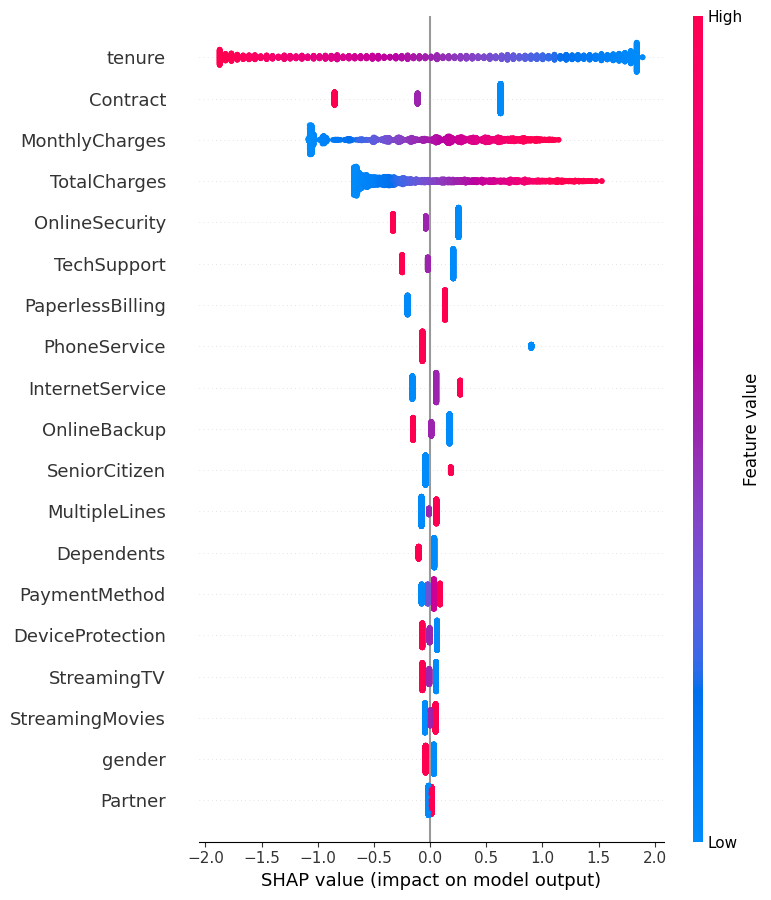

In [ ]:
# Model Explainability with SHAP

# shap explainability
explainer = shap.LinearExplainer(model, x_train, feature_names=x.columns)
shap_values = explainer.shap_values(x_test)

# Convert x_test back to a DataFrame
x_test_df = pd.DataFrame(x_test, columns=x.columns)

shap.summary_plot(shap_values, x_test, feature_names=x.columns)

force_plot = shap.force_plot(explainer.expected_value, shap_values[0], x_test_df.iloc[0,:])
shap.save_html("shap_force_plot.html", force_plot)


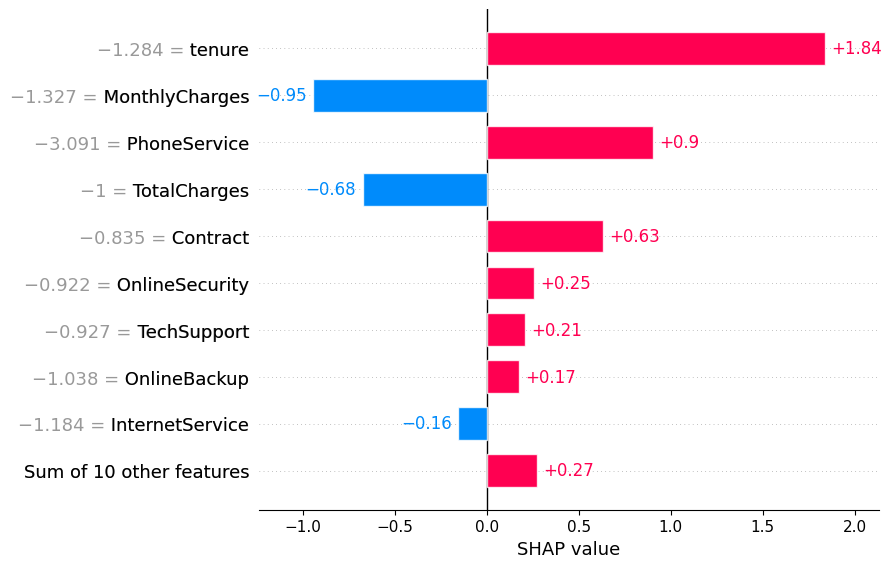

In [ ]:
# Bar plot for one customer
shap.plots.bar(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=x_test_df.iloc[0,:], feature_names=x.columns))


In [ ]:
# eli5 explanability

from eli5.sklearn import PermutationImportance

eli5.show_weights(model, feature_names=x.columns.tolist())
eli5.show_prediction(model, x_test[0], feature_names=x.columns.tolist())

In [ ]:
# Customer Segmentation

# Get churn probabilities
y_prob = model.predict_proba(x_test)[:, 1]

# Create segments
segments = []
for p in y_prob:
  if p > 0.6:
    segments.append("At Risk")

  elif p < 0.3:
    segments.append("Loyal")

  else:
    segments.append("Dormant")

seg_df = pd.DataFrame({"Churn_prob":y_prob, "Segment":segments})
print(seg_df['Segment'].value_counts())


Segment
Loyal      1284
Dormant     520
At Risk     309
Name: count, dtype: int64
